### Importing Liberaries & Cleanning The Dataset

In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

df_original = pd.read_csv(r'C:\Users\Mohamed Fawzi\Desktop\Netflix Content Strategy\netflix_content.csv')

df = df_original.copy()

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24812 entries, 0 to 24811
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                24812 non-null  object
 1   Available Globally?  24812 non-null  object
 2   Release Date         8166 non-null   object
 3   Hours Viewed         24812 non-null  object
 4   Language Indicator   24812 non-null  object
 5   Content Type         24812 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB


In [3]:
df.head(2)

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,"81,21,00,000",English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,"66,51,00,000",English,Show


-   Notice that the Hours Viewed column dtype is not a numerical format, we need to convert it to a float instead

In [4]:
# converting the column to a float instead of a string
df['Hours Viewed'] = df['Hours Viewed'].replace(',', '', regex=True).astype(float)

df['Hours Viewed'].head()

0    812100000.0
1    665100000.0
2    622800000.0
3    507700000.0
4    503000000.0
Name: Hours Viewed, dtype: float64

In [5]:
# Convert the 'Release Date' column to datetime
df['Release Date'] = pd.to_datetime(df['Release Date'])

# Extract year, month, and day from the 'Release Date' column
df['Year'] = df['Release Date'].dt.year
df['Month'] = df['Release Date'].dt.month
df['Day'] = df['Release Date'].dt.day


In [6]:
# convert the Year column to an integer
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').fillna(0).astype(int)

# Convert the Month column to an integer
df['Month'] = pd.to_numeric(df['Month'], errors='coerce').fillna(0).astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24812 entries, 0 to 24811
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Title                24812 non-null  object        
 1   Available Globally?  24812 non-null  object        
 2   Release Date         8166 non-null   datetime64[ns]
 3   Hours Viewed         24812 non-null  float64       
 4   Language Indicator   24812 non-null  object        
 5   Content Type         24812 non-null  object        
 6   Year                 24812 non-null  int32         
 7   Month                24812 non-null  int32         
 8   Day                  8166 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(2), object(4)
memory usage: 1.5+ MB


### Dataset Exploration (EDA):
-   ### Points to Explore:
    -   1. Global Availability Analysis
    -   2. Release Date Analysis
    -   3. Hours Viewed Analysis
    -   4. Language Analysis
    -   5. Content Type Analysis
    -   6. Seasonal Analysis
    -   7. Correlation Analysis

#### 3. Language Analysis:
- What is the distribution of viewing hours on Netflix by different languages?

    

In [7]:
df.head(2)

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type,Year,Month,Day
0,The Night Agent: Season 1,Yes,2023-03-23,812100000.0,English,Show,2023,3,23.0
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000.0,English,Show,2023,1,5.0


##### Counting the titles of each language


In [26]:
# Languages distribution
languages_distribution = df['Language Indicator'].value_counts().to_frame()

languages_distribution

,count
Language Indicator,
English,17268
Non-English,3252
Japanese,2297
Korean,1582
Hindi,374
Russian,39


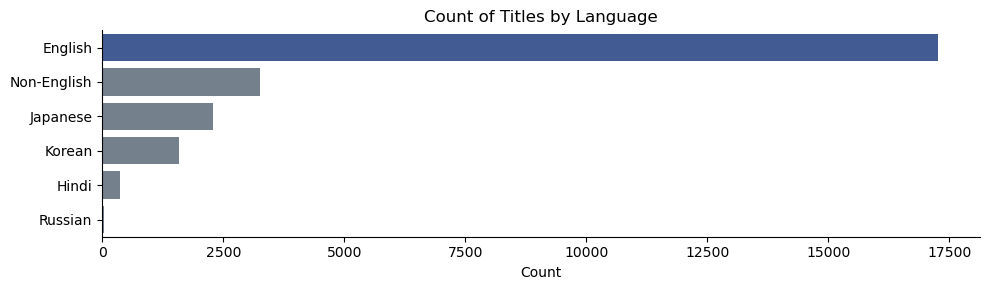

In [29]:

colors = ['#3557A0'] + ['slategrey'] * (len(languages_distribution)-1) # make the first color is blue and the rest are grey

plt.figure(figsize=(10, 3))

sns.barplot(data=languages_distribution,
            x='count',
            y='Language Indicator',
            palette=colors,
            
    
)

plt.xlabel('Count')
plt.ylabel('')
plt.title('Count of Titles by Language')

sns.despine()
plt.tight_layout()
plt.show()


-   #### Key Insights:
    -  English titles far exceed others, with approximately 17,000 titles. This suggests a strong preference or larger market for English-language content.
    -  With around 5,000 titles, non-English content also has a significant presence, indicating a diverse audience.
    -  Japanese (3,500 titles) and Korean (2,500 titles) content are prominent, reflecting the popularity of content from these regions.

##### Analyzing the viewership across different languages

In [35]:
languages_viewership = df.groupby('Language Indicator')['Hours Viewed'].sum().sort_values(ascending=False).to_frame()

languages_viewership

,Hours Viewed
Language Indicator,
English,1.244417e+11
Korean,1.537840e+10
Non-English,1.043910e+10
Japanese,7.102000e+09
Hindi,9.261000e+08
Russian,1.146000e+08


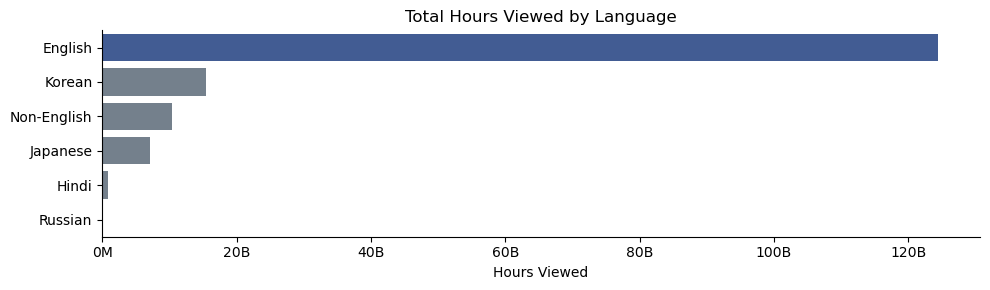

In [ ]:
plt.figure(figsize=(10, 3))

sns.barplot(data=languages_viewership,
            x='Hours Viewed',
            y='Language Indicator',
            palette=colors,           
)


def billion_formatter(value, params):
    """Formats tick labels to display billions with abbreviation."""
    if value >= 1e9:
        return f"{value / 1e9:.0f}B"
    elif value <= 1e9:
        return f"{value / 1e6:.0f}M"
    else:
        return f"{value:.1f}"
# Format y-axis tick labels
plt.gca().xaxis.set_major_formatter(billion_formatter)

plt.title('Total Hours Viewed by Language')
plt.ylabel('')


sns.despine()
plt.tight_layout()
plt.show()

-   #### Key Insights:
    -  English has the highest total hours viewed, significantly surpassing all other languages. This suggests a strong preference or larger audience for English-language content.
    -  Korean and Japanese content have substantial hours viewed, indicating their popularity and the significant audience for Asian-language content.
    -  The "Non-English" category also has a considerable number of hours viewed, highlighting the diverse preferences of viewers who watch content in languages other than English.